In [4]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to C:\Users\Palak
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = pd.read_csv(r"C:\Users\Palak Jain\Documents\clean_chatgpt_reviews.csv[1]\clean_chatgpt_reviews.csv")

print(f"Dataset shape : {data.shape}")

Dataset shape : (149719, 6)


In [12]:
data

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50
...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,27-07-2023 16:26
149715,149721,Andrew Bourgeois,its grear,5,0,23-09-2023 16:25
149716,149722,Dern Bob,Funtastic App,5,0,08-11-2023 13:57
149717,149723,Abdur rahman arif,hi all,5,0,25-07-2023 15:32


In [14]:
data.isnull().sum()

Unnamed: 0       0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149719 entries, 0 to 149718
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     149719 non-null  int64 
 1   userName       149719 non-null  object
 2   content        149719 non-null  object
 3   score          149719 non-null  int64 
 4   thumbsUpCount  149719 non-null  int64 
 5   at             149719 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [18]:
print(f"Rating value count: \n{data['score'].value_counts()}")

Rating value count: 
score
5    113738
4     17581
1      9555
3      6256
2      2589
Name: count, dtype: int64


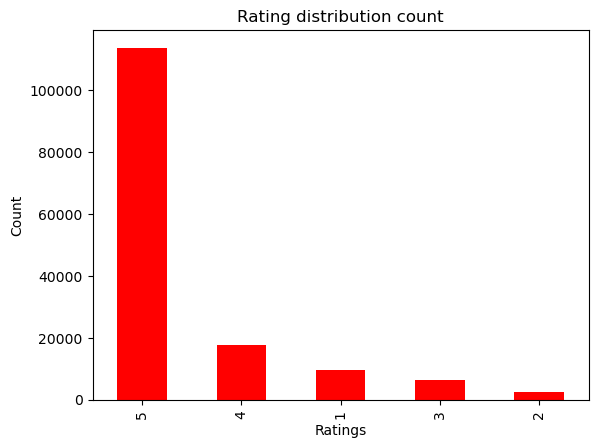

In [20]:
#Bar plot to visualize the total counts of each rating

data['score'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [22]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['score'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
score
5    75.97
4    11.74
1     6.38
3     4.18
2     1.73
Name: count, dtype: float64


In [24]:
#lets plot above value in graph chart

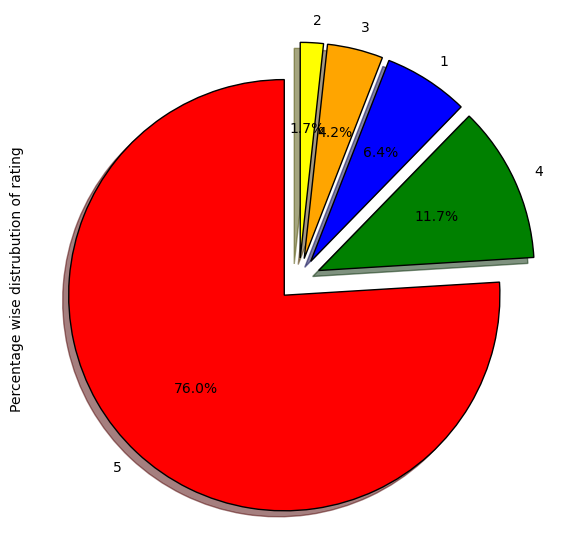

In [26]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['score'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [28]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['thumbsUpCount'].value_counts()}")

Feedback value count: 
thumbsUpCount
0      144491
1        3040
2         711
3         302
4         151
        ...  
881         1
277         1
700         1
231         1
93          1
Name: count, Length: 230, dtype: int64


In [30]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['thumbsUpCount'] == 0].iloc[1]['content']
print(review_0)

perfect


In [32]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['thumbsUpCount'] == 3].iloc[1]['content']
print(review_0)

"ChatGPT has been an invaluable addition to my digital toolkit. It's like having a knowledgeable friend available 24/7. The depth of information it provides is impressive, and its ability to offer quick, concise answers to my questions is remarkable. Whether I need help with research, writing, or just a friendly chat, ChatGPT delivers every time. It's become an indispensable resource for both personal and professional purpos


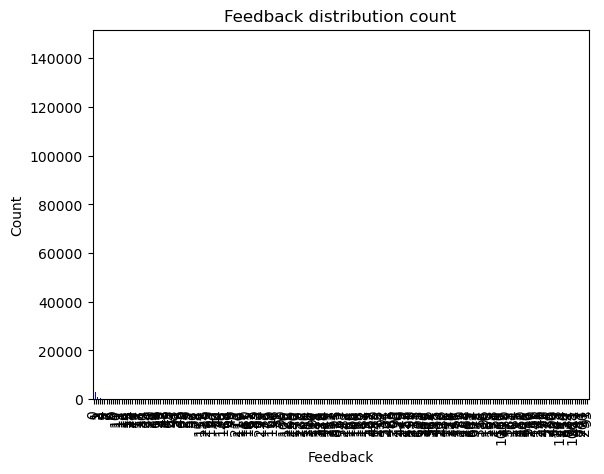

In [34]:
#Bar graph to visualize the total counts of each feedback

data['thumbsUpCount'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [36]:
#Feedback = 0
data[data['thumbsUpCount'] == 0]['score'].value_counts()

score
5    111384
4     16863
1      8157
3      5785
2      2302
Name: count, dtype: int64

In [38]:
###Analyzing 'userName' column

In [40]:
print(f"Variation value count: \n{data['userName'].value_counts()}")

Variation value count: 
userName
Amit Kumar            31
Manoj Kumar           31
Alex                  28
Abhishek Kumar        28
Rahul Kumar           26
                      ..
Lay                    1
Jeff Abshier           1
Anushka Bhatt          1
Md. Minhazul Haque     1
Tushar Deran           1
Name: count, Length: 138416, dtype: int64


In [42]:
###Analyzing 'content' column
###This column contains the textual review given by the user .

In [44]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['content'].apply(len)

In [46]:
data.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at,length
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07,26
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56,7
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54,29
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51,46
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50,75


In [48]:
data['length'].describe()

count    149719.000000
mean         49.626627
std          78.030797
min           1.000000
25%           9.000000
50%          20.000000
75%          54.000000
max         500.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

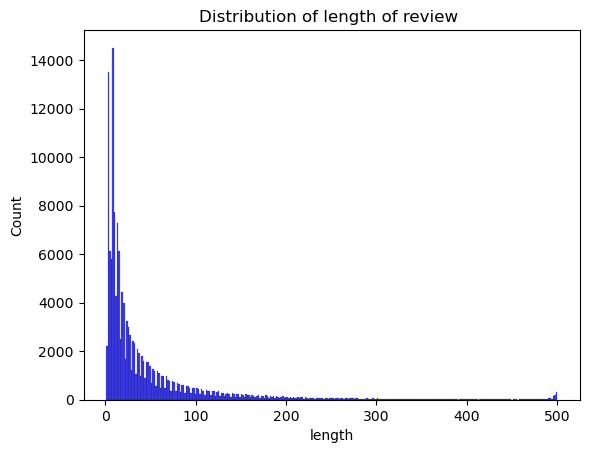

In [50]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

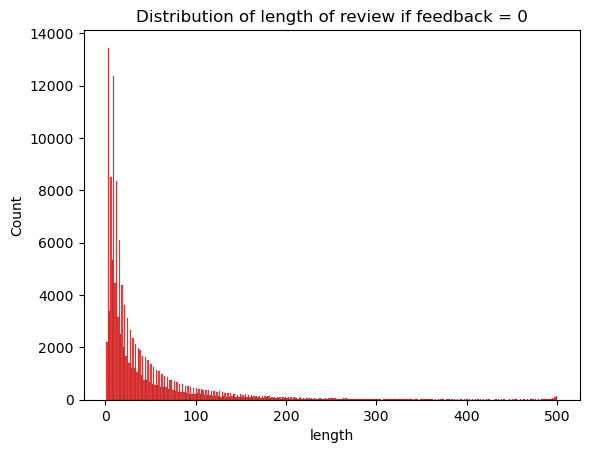

In [52]:
sns.histplot(data[data['thumbsUpCount']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

In [54]:
#Lengthwise mean rating

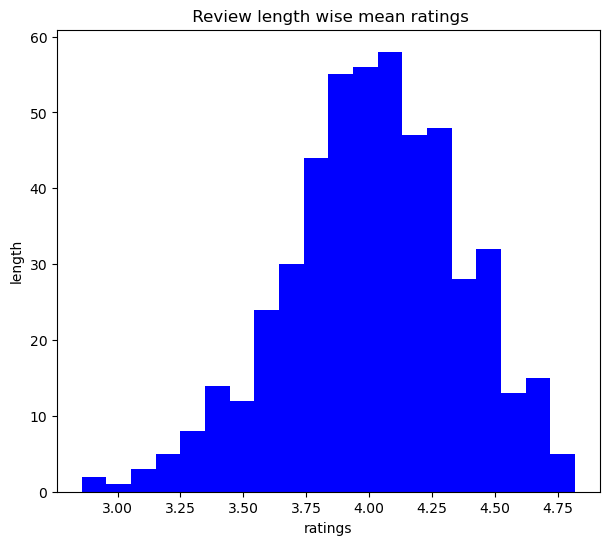

In [56]:
data.groupby('length')['score'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [58]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.content)

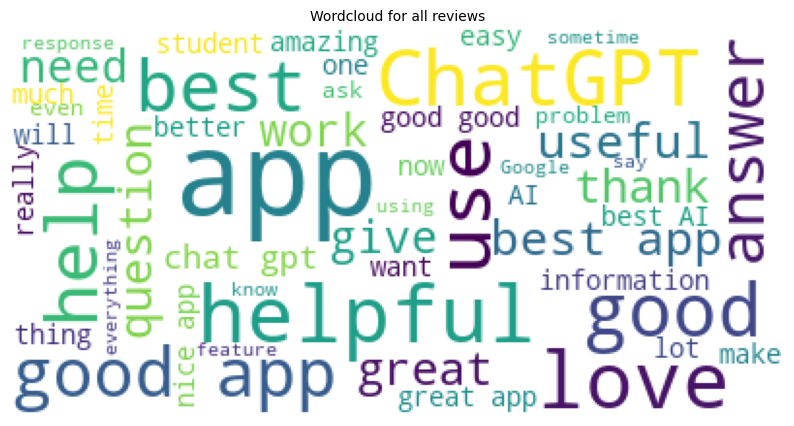

In [60]:
# Combine all reviews
reviews = " ".join([review for review in data['content']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [68]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['score'] == 1 ]['content']])
neg_reviews = " ".join([review for review in data[data['score'] == 2 ]['content']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['score'] == 4 ]['content']])
pos_reviews = " ".join([review for review in data[data['score'] == 5 ]['content']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

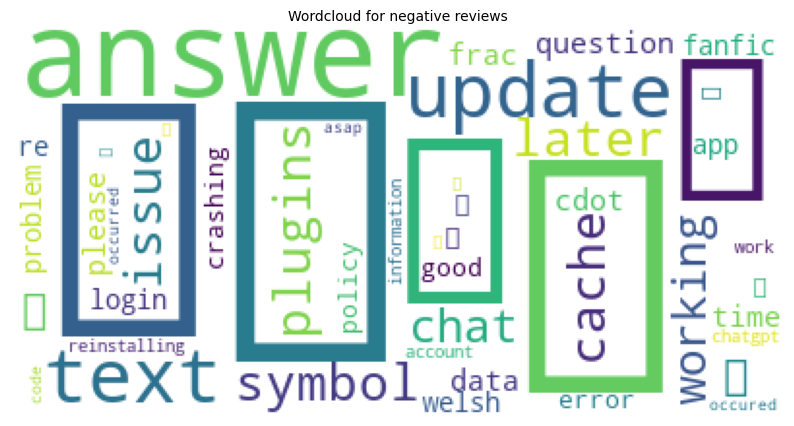

In [69]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

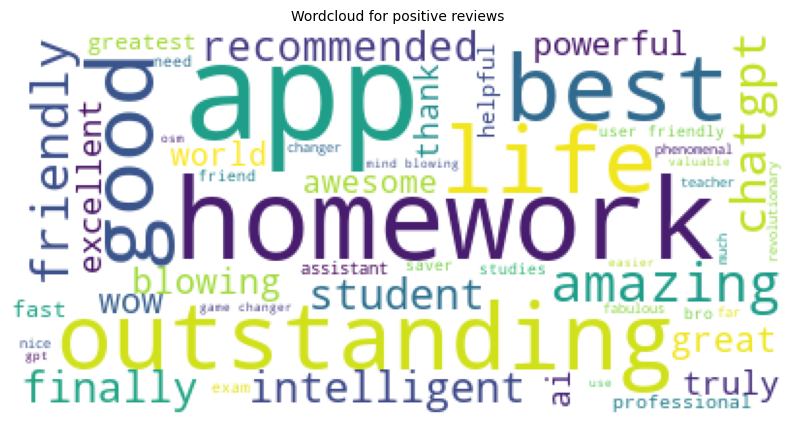

In [72]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# MODEL BUILDING 

In [ ]:
# Preprocessing Data

In [4]:
data.shape

(149719, 6)

In [5]:
data = data.drop_duplicates(keep="last")

In [6]:
data["score"].value_counts()

score
5    113738
4     17581
1      9555
3      6256
2      2589
Name: count, dtype: int64

In [7]:
data1 = data["score"].replace({4:0, 5:0, 3:2})
data1.shape

(149719,)

In [8]:
data1.value_counts()

score
0    131319
1      9555
2      8845
Name: count, dtype: int64

In [ ]:
# 0 - positive reviews
# 1 - neutral reviews
# 2 - negative reviews

<Axes: xlabel='score', ylabel='Count'>

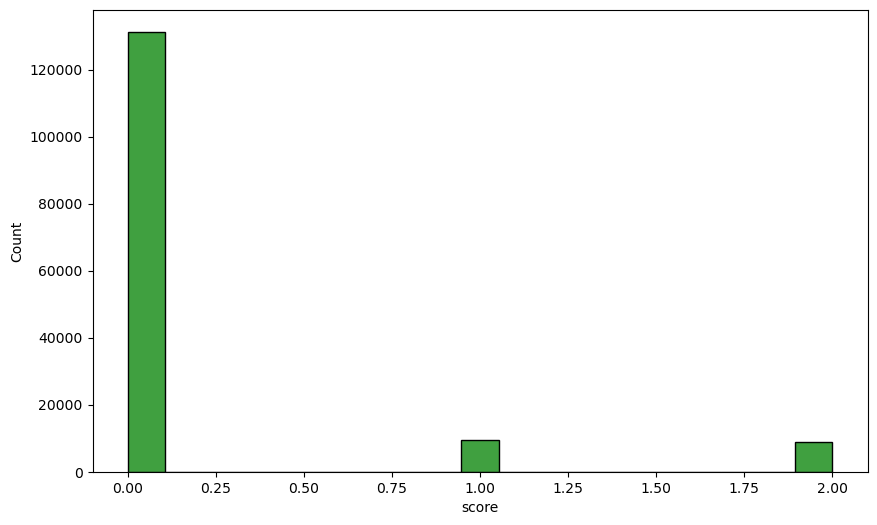

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data1, color="green")

In [10]:
reviews = data.iloc[:, 2]
ratings = data1.values

In [ ]:
# Removing punctuations and converting to lowercase

In [11]:
import re
def preprocess(review):
    review = re.sub(r"[^\w\s]", " ", review)
    review = review.lower()
    return review

reviews = reviews.apply(preprocess)


In [12]:
reviews

0                                excellent im impressed    
1                                                   perfect
2                             its been so helpful   love it
3            it s amazing tools help me a lot with my work 
4         i enjoyed chatgpt  but last update ruined ever...
                                ...                        
149714                                          update 2023
149715                                            its grear
149716                                        funtastic app
149717                                               hi all
149718                                   expert application
Name: content, Length: 149719, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Scores each word in a review and scores it based on how many times it has been used. Being used less number of times 
# indicates specificity and more number of times indicates importance.

In [14]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(reviews)
Y = ratings

In [ ]:
# Models

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression(max_iter = 200)
logreg.fit(x_train, y_train)
predictions_lr = logreg.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
accuracy_lr = accuracy_score(y_test, predictions_lr)
cf_lr = confusion_matrix(y_test, predictions_lr)
print(accuracy_lr*100)

89.93527962009338


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

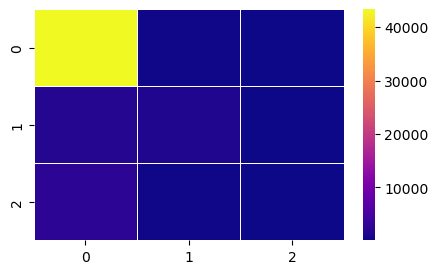

In [22]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_lr, cmap="plasma", linewidth=0.5)
plt.show()

In [23]:
from sklearn.svm import SVC

In [24]:
svm = SVC()
svm.fit(x_train, y_train)
predictions_svm = svm.predict(x_test)

In [25]:
accuracy_svm = accuracy_score(y_test, predictions_svm)
cf_svm = confusion_matrix(y_test, predictions_svm)
print(accuracy_svm*100)

90.04949205522271


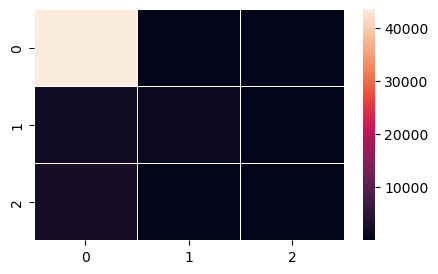

In [26]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_svm, linewidth=0.5)
plt.show()

In [27]:
linear_svm = SVC(kernel="linear")
linear_svm.fit(x_train, y_train)
predictions_lsvm = linear_svm.predict(x_test)

In [28]:
accuracy_lsvm = accuracy_score(y_test, predictions_lsvm)
cf_lsvm = confusion_matrix(y_test, predictions_lsvm)
print(accuracy_svm*100)

90.04949205522271


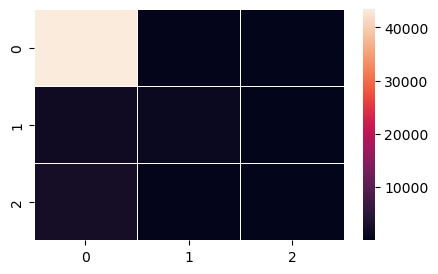

In [29]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_lsvm, linewidth=0.5)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

In [32]:
accuracy_rf = accuracy_score(y_test, predictions_rf)
cf_rf = confusion_matrix(y_test, predictions_rf)
print(accuracy_rf*100)

89.68882120744584


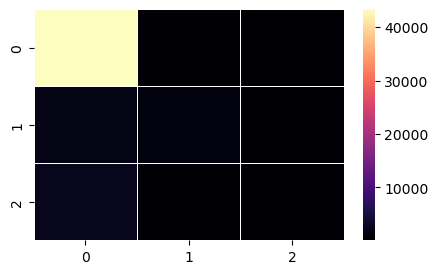

In [33]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_lr, cmap="magma", linewidth=0.5)
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

In [36]:
accuracy_knn = accuracy_score(y_test, predictions_knn)
cf_knn = confusion_matrix(y_test, predictions_knn)
print(accuracy_knn*100)

88.66291301821387


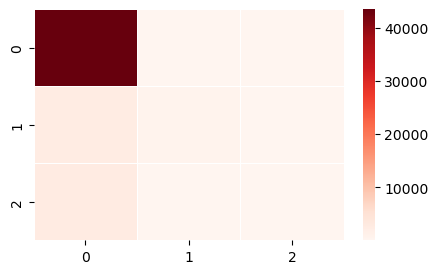

In [37]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_knn, cmap="Reds", linewidth=0.5)
plt.show()

In [ ]:
# Naive Bayes 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_mnb * 100:.2f}%")

cf_mnb = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

sns.heatmap(cf_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (0=Negative, 1=Neutral, 2=Positive)')
plt.show()

In [ ]:
# Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_dt * 100:.2f}%")

matrix_dt = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (0=Negative, 1=Neutral, 2=Positive)')
plt.show()

In [ ]:
# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_gb * 100:.2f}%")

matrix_gb = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

sns.heatmap(matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (0=Negative, 1=Neutral, 2=Positive)')
plt.show()


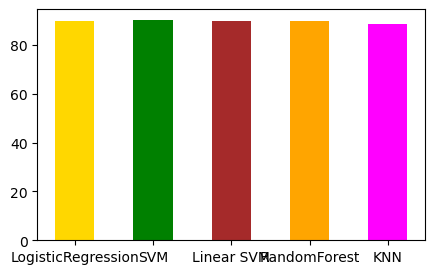

In [39]:
accuracies = [accuracy_lr*100, accuracy_svm*100, accuracy_lsvm*100, accuracy_rf*100, accuracy_knn*100, accuracy_mnb*100, accuracy_gb*100, accuracy_dt*100]
labels = ["LR", "SVM", "LSVM", "RanForest", "KNN", "MNB", "GB", "DT"]
colors = ["gold", "green", "brown", "orange", "magenta"]

plt.figure(figsize=(5, 3))
plt.bar(labels, accuracies, color=colors, width=0.5)
plt.show()